# Tutorial on how to use grid sampling

In [1]:
import os

import geopandas as gpd
from shapely.ops import unary_union
import rasterio

from gdl.samplers.aoi_sampler import AoiSampler
from gdl.datasets.polygon import PolygonSplitter
from gdl.datasets.benchmark import get_field_D_grid_split

# Init paths (currently reflect my local structure. might have to be adapted)
data_dir = os.path.join('/home/tombola/garrulus/mi-thesis-activelearning', 'data')
grid_path = os.path.join(data_dir, "grid", "grid-10m-squares.shp")
fence_path = os.path.join(data_dir, "fenced_area", "fenced-area.shp")
raster_dir = os.path.join(data_dir,'raster_image')
raster_image = os.path.join(raster_dir, 'd-RGB-9mm-reference.tif')

# Load training polygons
train_indices, validation_indices, test_indices = get_field_D_grid_split()
ps = PolygonSplitter(grid_path=grid_path, fenced_area_path=fence_path)
train_polygons = ps.get_polygon_by_indices(train_indices)
merged_polygons = unary_union(train_polygons)

# Load fenced area
fenced_area = gpd.read_file(fence_path)
outer_shape = fenced_area.geometry.union_all()

# Getting the raster image resolution. 
# This is necessary to scale down each pixel to the appropriate size in longitude and latitude.
with rasterio.open(raster_image) as src:
    raster_resolution = src.res[0]

# Init AOI sampler
aoi_sampler = AoiSampler(merged_polygons, outer_shape)

# Sample AOIs with grid sampling
WINDOW_SIZE = 256
window_size_scaled = WINDOW_SIZE * raster_resolution
aois = aoi_sampler.sample_grid(window_size_scaled=window_size_scaled, overlap=0.0, polygon_intersection=0.5)


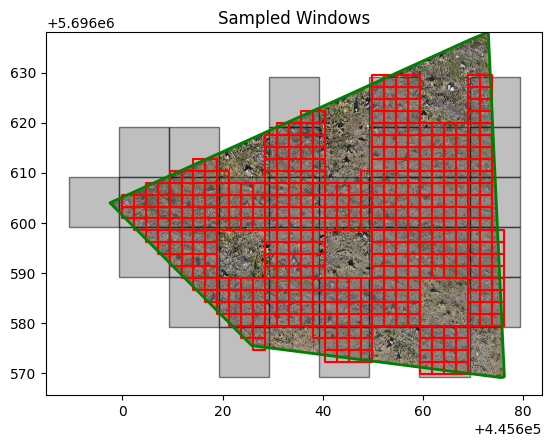

In [2]:
# Visualize the sampled AOIs
aoi_sampler.show_windows(polygons=train_polygons, windows=aois, image=raster_image, boundary_shape=outer_shape)
